Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

## Introduction

This is to implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'suck'

**__Note**:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.



## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`.

In [ ]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned





```
# This is formatted as code
```

Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: east
step 1 - action: north
step 2 - action: west
step 3 - action: south
step 4 - action: north
step 5 - action: east
step 6 - action: west
step 7 - action: east
step 8 - action: east
step 9 - action: suck
step 10 - action: east
step 11 - action: south
step 12 - action: south
step 13 - action: north
step 14 - action: west
step 15 - action: east
step 16 - action: east
step 17 - action: south
step 18 - action: north
step 19 - action: south


1

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:

import numpy as np # import numpy library for random numbers and arrays

n = 5 # size of the room
p = 0.2 # probability of dirt on each square
max_steps = 20

room = np.random.rand(n, n) < p

agent_pos = (np.random.randint(n), np.random.randint(n))

def display_room(room, agent_pos):
  for i in range(n):
    for j in range(n):
      if (i, j) == agent_pos:
        print("A", end = " ")
      elif room[i, j]:
        print("X", end = " ")
      else:
        print("O", end = " ")
    print()
def is_clean(room):
  return not np.any(room)
def environment(agent, max_steps, agent_pos, verbose = True): # add agent_pos as a parameter
    num_cleaned = 0
    num_steps = 0
    while not is_clean(room) and num_steps < max_steps:
        bumpers = {
            "north" : agent_pos[0] == 0,
            "east" : agent_pos[1] == n - 1,
            "south" : agent_pos[0] == n - 1,
            "west" : agent_pos[1] == 0
        }

        dirty = room[agent_pos]

        action = agent(bumpers, dirty)

        if action == "suck":
            if dirty:
                room[agent_pos] = False
                num_cleaned += 1
        elif action == "north":
            if not bumpers["north"]:
                agent_pos = (agent_pos[0] - 1, agent_pos[1])
        elif action == "east":
            if not bumpers["east"]:
                agent_pos = (agent_pos[0], agent_pos[1] + 1)
        elif action == "south":
            if not bumpers["south"]:
                agent_pos = (agent_pos[0] + 1, agent_pos[1])
        elif action == "west":
            if not bumpers["west"]:
                agent_pos = (agent_pos[0], agent_pos[1] - 1)

        num_steps += 1

        if verbose:
            print("step", num_steps, "- action:", action)
            display_room(room, agent_pos)
            print()

    return num_steps



In [ ]:
import numpy as np
actions = ["north", "east", "west", "south", "suck"]
def simple_randomized_agent(bumpers, dirty):
  return np.random.choice(actions)
performance = environment(simple_randomized_agent, max_steps, agent_pos) # add agent_pos as an argument
print("The agent cleaned the room in", performance, "steps.")


step 1 - action: south
X O X O O 
O O O O O 
X X O O O 
X O O X O 
O O O O A 

step 2 - action: west
X O X O O 
O O O O O 
X X O O O 
X O O X O 
O O O A X 

step 3 - action: south
X O X O O 
O O O O O 
X X O O O 
X O O X O 
O O O A X 

step 4 - action: suck
X O X O O 
O O O O O 
X X O O O 
X O O X O 
O O O A X 

step 5 - action: south
X O X O O 
O O O O O 
X X O O O 
X O O X O 
O O O A X 

step 6 - action: east
X O X O O 
O O O O O 
X X O O O 
X O O X O 
O O O O A 

step 7 - action: suck
X O X O O 
O O O O O 
X X O O O 
X O O X O 
O O O O A 

step 8 - action: south
X O X O O 
O O O O O 
X X O O O 
X O O X O 
O O O O A 

step 9 - action: east
X O X O O 
O O O O O 
X X O O O 
X O O X O 
O O O O A 

step 10 - action: north
X O X O O 
O O O O O 
X X O O O 
X O O X A 
O O O O O 

step 11 - action: south
X O X O O 
O O O O O 
X X O O O 
X O O X O 
O O O O A 

step 12 - action: suck
X O X O O 
O O O O O 
X X O O O 
X O O X O 
O O O O A 

step 13 - action: south
X O X O O 
O O O O O 
X X O O O

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south"]

def simple_reflex_agent(bumpers, dirty):
  if dirty:
    return "suck"
  else:
    valid_actions = [action for action in actions if not bumpers[action]]
    return np.random.choice(valid_actions)


In [ ]:

performance = environment(simple_reflex_agent, max_steps,agent_pos)
print("The agent cleaned the room in", performance, "steps.")


step 1 - action: south
X O X O O 
O O O O O 
X X O O O 
X O O X O 
O O O O A 

step 2 - action: west
X O X O O 
O O O O O 
X X O O O 
X O O X O 
O O O A O 

step 3 - action: north
X O X O O 
O O O O O 
X X O O O 
X O O A O 
O O O O O 

step 4 - action: suck
X O X O O 
O O O O O 
X X O O O 
X O O A O 
O O O O O 

step 5 - action: west
X O X O O 
O O O O O 
X X O O O 
X O A O O 
O O O O O 

step 6 - action: west
X O X O O 
O O O O O 
X X O O O 
X A O O O 
O O O O O 

step 7 - action: south
X O X O O 
O O O O O 
X X O O O 
X O O O O 
O A O O O 

step 8 - action: east
X O X O O 
O O O O O 
X X O O O 
X O O O O 
O O A O O 

step 9 - action: east
X O X O O 
O O O O O 
X X O O O 
X O O O O 
O O O A O 

step 10 - action: west
X O X O O 
O O O O O 
X X O O O 
X O O O O 
O O A O O 

step 11 - action: north
X O X O O 
O O O O O 
X X O O O 
X O A O O 
O O O O O 

step 12 - action: north
X O X O O 
O O O O O 
X X A O O 
X O O O O 
O O O O O 

step 13 - action: west
X O X O O 
O O O O O 
X A O O O 


## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"] # define a list of actions

n = 5 # size of the room
p = 0.2

def is_corner(row, col):
  return (row == 0 or row == n - 1) and (col == 0 or col == n - 1)

def is_complete(visited):
  return np.all(visited)

def is_done(room, visited):
  return is_clean(room) and is_complete(visited)

def get_action(bumpers, dirty, row, col, room, visited):
  if dirty:
    return "suck"
  elif not is_corner(row, col):
    if row < n // 2:
      return "north"
    elif row > n // 2:
      return "south"
    elif col < n // 2:
      return "west"
    elif col > n // 2:
      return "east"
  else:
    if row == 0 and col == 0:
      if not bumpers["east"]:
        return "east"
      else:
        return "south"
    elif row == 0 and col == n - 1:
      if not bumpers["south"]:
        return "south"
      else:
        return "west"
    elif row == n - 1 and col == n - 1:
      if not bumpers["west"]:
        return "west"
      else:
        return "north"
    elif row == n - 1 and col == 0:
      if not bumpers["north"]:
        return "north"
      else:
        return "east"
def model_based_reflex_agent(bumpers, dirty):
  if not hasattr(model_based_reflex_agent, "row"):
    model_based_reflex_agent.row = np.random.randint(n)
  if not hasattr(model_based_reflex_agent, "col"):
    model_based_reflex_agent.col = np.random.randint(n)
  if not hasattr(model_based_reflex_agent, "room"):
    model_based_reflex_agent.room = np.random.rand(n, n) < p
  if not hasattr(model_based_reflex_agent, "visited"):
    model_based_reflex_agent.visited = np.zeros((n, n), dtype=bool)
  action = get_action(bumpers, dirty, model_based_reflex_agent.row, model_based_reflex_agent.col, model_based_reflex_agent.room, model_based_reflex_agent.visited)

  if action == "suck":
    model_based_reflex_agent.room[model_based_reflex_agent.row, model_based_reflex_agent.col] = False
  elif action == "north":
    model_based_reflex_agent.row = (model_based_reflex_agent.row - 1) % n
  elif action == "east":
    model_based_reflex_agent.col = (model_based_reflex_agent.col + 1) % n
  elif action == "south":
    model_based_reflex_agent.row = (model_based_reflex_agent.row + 1) % n
  elif action == "west":
    model_based_reflex_agent.col = (model_based_reflex_agent.col - 1) % n

  model_based_reflex_agent.visited[model_based_reflex_agent.row, model_based_reflex_agent.col] = True

  return action


In [ ]:
# Your code goes here
performance = environment(model_based_reflex_agent, max_steps,agent_pos)
print("The agent cleaned the room in", performance, "steps.")


step 1 - action: south
O O X O O 
O O O O O 
X O O O O 
X O O O O 
O O O O A 

step 2 - action: south
O O X O O 
O O O O O 
X O O O O 
X O O O O 
O O O O A 

step 3 - action: north
O O X O O 
O O O O O 
X O O O O 
X O O O A 
O O O O O 

step 4 - action: south
O O X O O 
O O O O O 
X O O O O 
X O O O O 
O O O O A 

step 5 - action: north
O O X O O 
O O O O O 
X O O O O 
X O O O A 
O O O O O 

step 6 - action: south
O O X O O 
O O O O O 
X O O O O 
X O O O O 
O O O O A 

step 7 - action: north
O O X O O 
O O O O O 
X O O O O 
X O O O A 
O O O O O 

step 8 - action: south
O O X O O 
O O O O O 
X O O O O 
X O O O O 
O O O O A 

step 9 - action: north
O O X O O 
O O O O O 
X O O O O 
X O O O A 
O O O O O 

step 10 - action: south
O O X O O 
O O O O O 
X O O O O 
X O O O O 
O O O O A 

step 11 - action: north
O O X O O 
O O O O O 
X O O O O 
X O O O A 
O O O O O 

step 12 - action: south
O O X O O 
O O O O O 
X O O O O 
X O O O O 
O O O O A 

step 13 - action: north
O O X O O 
O O O O O 
X O

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

actions = ["north", "east", "west", "south", "suck"]

def is_corner(row, col, n):
  return (row == 0 or row == n - 1) and (col == 0 or col == n - 1)

def is_complete(visited):
  return np.all(visited)

def is_clean(room):
  return np.all(~room)

def is_done(room, visited):
  return is_clean(room) and is_complete(visited)
def get_action_randomized(bumpers, dirty, row, col, room, visited, n):
    return np.random.choice(actions)


def get_action_simple_reflex(bumpers, dirty, row, col, room, visited, n):
  if dirty:
    return "suck"
  else:
    possible_actions = [action for action in actions if action != 'suck' and not bumpers[action]]
    if possible_actions:
      return np.random.choice(possible_actions)
    else:
      return np.random.choice(actions)
def get_action_model_based(bumpers, dirty, row, col, room, visited, n):
  if dirty:
    return "suck"
  elif not is_corner(row, col, n):
    if row < n // 2:
      return "north"
    elif row > n // 2:
      return "south"
    elif col < n // 2:
      return "west"
    elif col > n // 2:
      return "east"
  else:
    if row == 0 and col == 0:
      if not bumpers["east"]:
        return "east"
      else:
        return "south"
    elif row == 0 and col == n - 1:
      if not bumpers["south"]:
        return "south"
      else:
        return "west"
    elif row == n - 1 and col == n - 1:
      if not bumpers["west"]:
        return "west"
      else:
        return "north"
    elif row == n - 1 and col == 0:
      if not bumpers["north"]:
        return "north"
      else:
        return "east"



In [ ]:
# define a function to get the next action for the agent_program
def agent_program(bumpers, dirty, *args):
  if agent_program == get_action_randomized:
    action = get_action_randomized(bumpers, dirty)
  elif agent_program == get_action_simple_reflex:
    action = get_action_simple_reflex(bumpers, dirty,*args)
  elif agent_program == get_action_model_based:
    action = get_action_model_based(bumpers, dirty, *args)
  if bumpers[action]:
    possible_actions = [a for a in actions if not bumpers[a]]
    action = np.random.choice(possible_actions)
  return action


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the environment function
def environment(agent_program, n, max_steps):
    p = 0.2
    room = np.random.rand(n, n) < p
    row = np.random.randint(n)
    col = np.random.randint(n)
    visited = np.zeros((n, n), dtype=bool)
    performance = 0
    for step in range(max_steps):
        if is_done(room, visited):
            break
        bumpers = {
            "north": row == 0 or room[row - 1, col],
            "east": col == n - 1 or room[row, col + 1],
            "south": row == n - 1 or room[row + 1, col],
            "west": col == 0 or room[row, col - 1]
        }
        dirty = room[row, col]
        action = agent_program(bumpers, dirty, row, col, room, visited, n)  # Provide additional arguments
        if action is not None:
            performance += 1
            if action == "suck":
                room[row, col] = False
            elif action == "north" and row > 0:
                row -= 1
            elif action == "east" and col < n - 1:
                col += 1
            elif action == "south" and row < n - 1:
                row += 1
            elif action == "west" and col > 0:
                col -= 1
            visited[row, col] = True
    return performance




                      Agent Room Size  Performance
0          Randomized Agent       5x5       100.00
1          Randomized Agent     10x10       100.00
2          Randomized Agent   100x100       100.00
3       Simple Reflex Agent       5x5       100.00
4       Simple Reflex Agent     10x10       100.00
5       Simple Reflex Agent   100x100       100.00
6  Model-based Reflex Agent       5x5        98.01
7  Model-based Reflex Agent     10x10        98.00
8  Model-based Reflex Agent   100x100       100.00


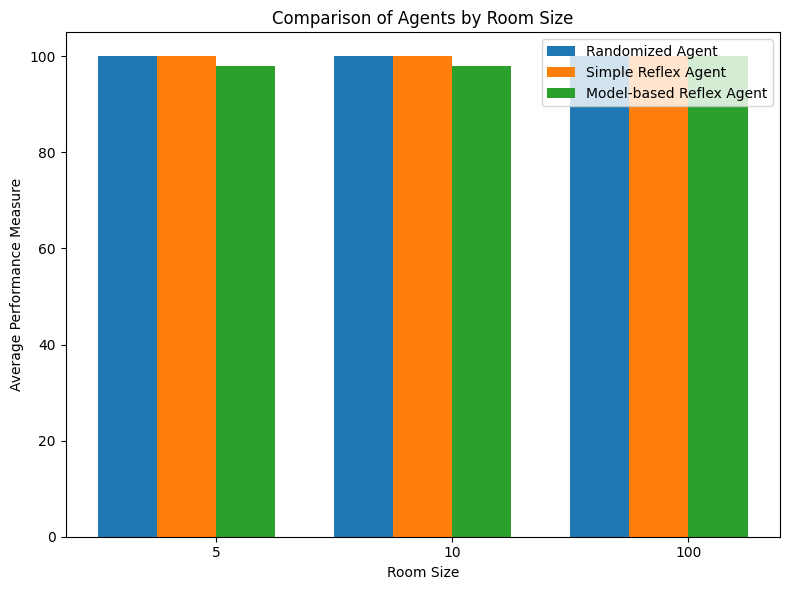

In [ ]:


def is_done(room, visited):
    return np.all(room == visited)

# Create lists for agents, agent names, and room sizes
agents = [get_action_randomized, get_action_simple_reflex, get_action_model_based]
agent_names = ["Randomized Agent", "Simple Reflex Agent", "Model-based Reflex Agent"]
room_sizes = [5, 10, 100]
max_steps = 100  # Increase max_steps for larger rooms

df = pd.DataFrame(columns=["Agent", "Room Size", "Performance"])

# Loop over agents, room sizes, and perform multiple runs to calculate average performance
for agent, agent_name in zip(agents, agent_names):
    for n in room_sizes:
        performance_list = []
        for i in range(100):  # Perform 100 runs for each configuration
            performance = environment(agent, n, max_steps)
            performance_list.append(performance)
        average_performance = np.mean(performance_list)
        df = pd.concat([df, pd.DataFrame({"Agent": [agent_name], "Room Size": [f"{n}x{n}"], "Performance": [average_performance]})], ignore_index=True)

# Print the DataFrame
print(df)

# Plotting
plt.figure(figsize=(8, 6))
x = np.arange(len(room_sizes))
width = 0.25
for i, agent_name in enumerate(agent_names):
    y = df[df["Agent"] == agent_name]["Performance"]
    plt.bar(x + i * width, y, width, label=agent_name)

plt.xticks(x + width * 1.5, room_sizes)
plt.xlabel("Room Size")
plt.ylabel("Average Performance Measure")
plt.title("Comparison of Agents by Room Size")
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

     Average performance of each model

|    | Agent                    | Room Size   |   Performance |
|---:|:-------------------------|:------------|--------------:|
|  0 | Randomized Agent         | 5x5         |        100    |
|  1 | Randomized Agent         | 10x10       |        100    |
|  2 | Randomized Agent         | 100x100     |        100    |
|  3 | Simple Reflex Agent      | 5x5         |        100    |
|  4 | Simple Reflex Agent      | 10x10       |        100    |
|  5 | Simple Reflex Agent      | 100x100     |        100    |
|  6 | Model-based Reflex Agent | 5x5         |         98.01 |
|  7 | Model-based Reflex Agent | 10x10       |         98    |
|  8 | Model-based Reflex Agent | 100x100     |        100    |

In [ ]:
# Your graphs and discussion of the results goes here

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

In [ ]:
# Answer goes here



- If it is put into a rectangular room with unknown size:

  - The randomized agent will perform poorly, as it will not have any knowledge of the room size or shape, and will choose actions randomly. It will likely waste a lot of steps and miss few dirty squares.
  - The simple reflex agent will perform slightly better, as it will use the bumpers and the dirty sensor to guide its actions. However, it will still not have any memory or model of the room, and will not be able to plan ahead or avoid revisiting the same squares.
  - The model-based reflex agent will perform the best, as it will use the bumpers, the dirty sensor, and the visited array to build a model of the room and its state. It will be able to explore the room efficiently and clean all the dirty squares.

- If the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms):

  - The randomized agent will perform poorly, as it will not be able to recognize the shape of the cleaning area, and will choose actions randomly. It will likely miss many dirty squares and get stuck in corners or dead ends.
  - The simple reflex agent will perform slightly better, as it will use the bumpers and the dirty sensor to guide its actions. However, it will still not have any memory or model of the cleaning area, and will not be able to plan ahead or avoid revisiting the same squares.
  - The model-based reflex agent will perform the best, as it will use the bumpers, the dirty sensor, and the visited array to build a model of the cleaning area and its state. It will be able to explore the cleaning area efficiently and clean all the dirty squares.

- If the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors):

  - The randomized agent will perform poorly, as it will not be able to avoid the obstacles, and will choose actions randomly. It will likely bump into the obstacles frequently and miss many dirty squares.
  - The simple reflex agent will perform slightly better, as it will use the bumpers and the dirty sensor to guide its actions. However, it will still not have any memory or model of the room, and will not be able to plan ahead or avoid revisiting the same squares.
  - The model-based reflex agent will perform the best, as it will use the bumpers, the dirty sensor, and the visited array to build a model of the room and its state. It will be able to avoid the obstacles and explore the room efficiently and clean all the dirty squares.




---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.
